# Banking: Customer Segmentation

*Created by: Anna Sukhareva, data scientist  
Antwerpen, Belgium  
Date: November 12, 2019  
Contacts: anna@linefeed.be*  
***

### Table of Contents
Stage 1 : Business Understanding  
Stage 2 : Analytic Approach  
Stage 3 : Data Requirements  
Stage 4 : Data Collection  
Stage 5 : Data Understanding and Preparation  
Stage 6 : Modeling 
Stage 7 : Conclusion
***

### Stage 1 : Business Understanding
**Problem:**  
The company aims to determine which customers are the most and least profitable, so that it can adjust their marketing budgets accordingly. Also, the company needs to evaluate customers in terms of the revenue they generate and the costs of establishing and maintaining relationships with them.  

**Question:**  
Can we perform a customer  segmentation, that divide customers into groups that can be targeted?  

### Stage 2 : Analytic Approach
To answer the question, we'll perform unsupervised machine learning technique of clustering with the K-Means classifier.  

### Stage 3 : Data Requirements
**Data content:** We need data about current accounts history, as data about accounts (sum of card debt, current status, debt-to-income ratio) and data about customer (age, education, employed status, income).  
**Data formats:** CSV format  
**Data sources:** corporative information from the company.

### Stage 4 :  Data Collection
Importing libraries:

In [1]:
import numpy as np 
import pandas as pd

# visualization
import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

import random 

Data is collected from IBM Cloud

In [1]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-11-11 15:42:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2019-11-11 15:42:51 (1.57 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [4]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Stage 5 :  Data Understanding and preprocessing  
**Preprocessing**: As k-means algorithm isn't directly applicable to categorical variables, we drop a categorical variable Address:

In [5]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Normalizing** , using StandardScaler:

In [6]:
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Stage 6 : Modeling 

In [7]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

Assigning the labels to each row in dataframe:

In [8]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


Checking the centroid values by averaging the features in each cluster:

In [9]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


**Plot: "Distribution of customers based on their age and income"**

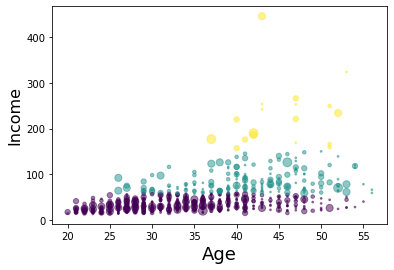

In [10]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

**Plot: "Distribution of customers based on their age, income and education"**

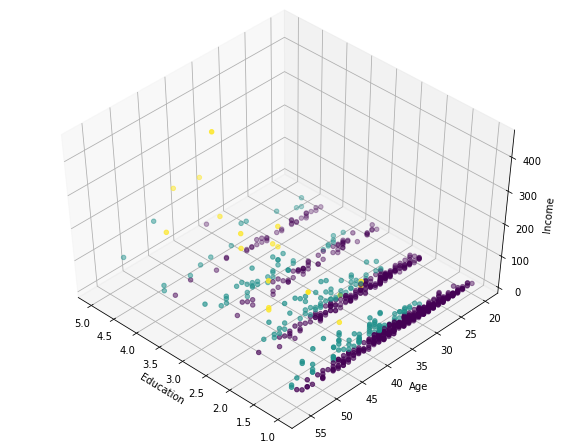

In [12]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

### Stage 7 : Conclusion   

In the result, the were 3 clusters determined. Now we can create a profile for each group, considering the common characteristics of each cluster:  

**Cluster 0**  
Young and low income  

**Cluster 1**  
Middle aged and middle income  

**Cluster 2**  
Affluent, educated and middle aged.  